# Machine Learning project

In [1]:
import pandas as pd #for data set manipulation
import numpy as np #for mathematical calculations
import matplotlib.pyplot as plt #for graphs , charts to unerstand data 
%matplotlib inline

# reading data

In [2]:
data=pd.read_csv('Obesity based on eating habits & physical cond\ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# preprocessing

In [3]:
data.info()    #to see if there is missing data in the data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
#then, there is no missing values in the data set 

In [5]:
#another way to check MV
print(data.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [6]:
data.isnull()          #if thereis no missing value, then it returns false

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#for checking if there is categorical data
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [8]:
print( data['Gender'].unique())
print(data['family_history_with_overweight'].unique())
print (data['FAVC'].unique())
print(data['CAEC'].unique())
print(data['SMOKE'].unique())
print(data['SCC'].unique())
print(data['CALC'].unique())
print(data['MTRANS'].unique())
print(data['NObeyesdad'].unique())
  #to show unique values of features of data type object

['Female' 'Male']
['yes' 'no']
['no' 'yes']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'yes']
['no' 'yes']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [9]:
data_encoded=data.replace({
        'Gender':{'Male':1,'Female':0},
        'family_history_with_overweight':{'no':0,'yes':1},
        'FAVC':{'no':0,'yes':1},
        'CAEC':{'Sometimes':0,'Frequently':1,'Always':2,'no':3},
        'SMOKE':{'no':0,'yes':1},
        'SCC':{'no':0,'yes':1},
        'CALC':{'Sometimes':0,'Frequently':1,'Always':2,'no':3},
        'MTRANS':{'Public_Transportation':0, 'Walking':1, 'Automobile':2, 'Motorbike':3,'Bike':4},
        'NObeyesdad':{'Normal_Weight':0, 'Overweight_Level_I':1, 'Overweight_Level_II':2,
                    'Obesity_Type_I':3, 'Insufficient_Weight':4, 'Obesity_Type_II':5,'Obesity_Type_III':6 }           
})

data_encoded

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0,0,2.000000,0,0.000000,1.000000,3,0,0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,0,1,3.000000,1,3.000000,0.000000,0,0,0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,0,0,2.000000,0,2.000000,1.000000,1,0,0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,1,1,1
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,0,0,1.728139,0,1.676269,0.906247,0,0,6
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,0,0,2.005130,0,1.341390,0.599270,0,0,6
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,0,0,2.054193,0,1.414209,0.646288,0,0,6
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,0,0,2.852339,0,1.139107,0.586035,0,0,6


In [10]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
gender_labels = gle.fit_transform(data['Gender'])
gender_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
gender_mappings

{0: 'Female', 1: 'Male'}

In [11]:
gle = LabelEncoder()
family_labels = gle.fit_transform(data['family_history_with_overweight'])
family_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
family_mappings

{0: 'no', 1: 'yes'}

In [12]:
gle = LabelEncoder()
FAVC_labels = gle.fit_transform(data['FAVC'])
FAVC_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
FAVC_mappings

{0: 'no', 1: 'yes'}

In [13]:
gle = LabelEncoder()
CAEC_labels = gle.fit_transform(data['CAEC'])
CAEC_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
CAEC_mappings

{0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}

In [14]:
gle = LabelEncoder()
SMOKE_labels = gle.fit_transform(data['SMOKE'])
SMOKE_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
SMOKE_mappings

{0: 'no', 1: 'yes'}

In [15]:
gle = LabelEncoder()
SCC_labels = gle.fit_transform(data['SCC'])
SCC_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
SCC_mappings

{0: 'no', 1: 'yes'}

In [16]:
gle = LabelEncoder()
CALC_labels = gle.fit_transform(data['CALC'])
CALC_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
CALC_mappings

{0: 'Always', 1: 'Frequently', 2: 'Sometimes', 3: 'no'}

In [17]:
gle = LabelEncoder()
MTRANS_labels = gle.fit_transform(data['MTRANS'])
MTRANS_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
MTRANS_mappings

{0: 'Automobile',
 1: 'Bike',
 2: 'Motorbike',
 3: 'Public_Transportation',
 4: 'Walking'}

In [18]:
gle = LabelEncoder()
NObeyesdad_labels = gle.fit_transform(data['NObeyesdad'])
NObeyesdad_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
NObeyesdad_mappings

{0: 'Insufficient_Weight',
 1: 'Normal_Weight',
 2: 'Obesity_Type_I',
 3: 'Obesity_Type_II',
 4: 'Obesity_Type_III',
 5: 'Overweight_Level_I',
 6: 'Overweight_Level_II'}

In [19]:
#then caterical data is encoded successfully 
#preprocessing is done

# feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_encoded)

StandardScaler()

In [21]:
data_encoded.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,0,2.0,0,0.0,1.0,3,0,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,0,1,3.0,1,3.0,0.0,0,0,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,0,2.0,0,2.0,1.0,1,0,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,1,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,0,2.0,0,0.0,0.0,0,0,2


# Splitting dataset into input and output

In [22]:
X = data_encoded.drop(columns=['NObeyesdad'])
y = data_encoded['NObeyesdad']

# Splitting dataset into train, validation, and test

In [23]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X , y , test_size=0.20, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=0)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('------------------------')
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('------------------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1350, 16)
y_train: (1350,)
------------------------
X_val: (338, 16)
y_val: (338,)
------------------------
X_test: (423, 16)
y_test: (423,)


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 100)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)

print('accuracy_train =', accuracy_train)
print('accuracy_val =', accuracy_val)

accuracy_train = 0.605925925925926
accuracy_val = 0.5739644970414202


In [26]:
# Hyperparameter tuning
## Tuning n_neighbors
from sklearn.metrics import accuracy_score
n_neighbours_values = list(range(1, 31))
accuracy_train_values = []
accuracy_val_values = []

for n_neighbours in n_neighbours_values:
    model = KNeighborsClassifier(n_neighbors = n_neighbours)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    accuracy_train_values.append(accuracy_train)
    accuracy_val_values.append(accuracy_val)
    
results = pd.DataFrame({
    'n_neighbours': n_neighbours_values,
    'accuracy_train': accuracy_train_values,
    'accuracy_val': accuracy_val_values
})

In [27]:
results

,n_neighbours,accuracy_train,accuracy_val
0,1,1.000000,0.893491
1,2,0.965185,0.896450
2,3,0.929630,0.884615
3,4,0.923704,0.893491
4,5,0.908889,0.887574
5,6,0.895556,0.866864
6,7,0.888889,0.857988
7,8,0.873333,0.843195
8,9,0.865185,0.849112
9,10,0.865185,0.837278


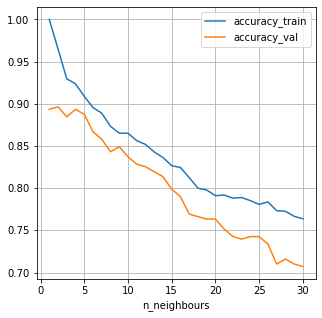

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

results.plot(x='n_neighbours', y=['accuracy_train', 'accuracy_val'], figsize=(5, 5))
plt.grid(axis='both')

In [29]:
## Tuning weights #n=8

weights_values = ['uniform', 'distance']
accuracy_train_values = []
accuracy_val_values = []

for weights in weights_values:
    model = KNeighborsClassifier(n_neighbors=10, weights=weights)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    accuracy_train_values.append(accuracy_train)
    accuracy_val_values.append(accuracy_val)
    
results = pd.DataFrame({
    'weights': weights_values,
    'accuracy_train': accuracy_train_values,
    'accuracy_val': accuracy_val_values
})

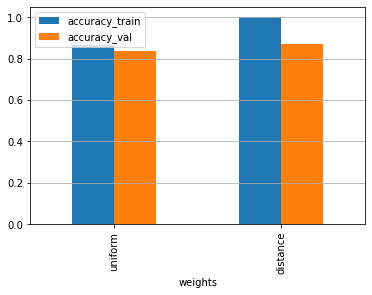

In [30]:
results.plot.bar(x='weights', y=['accuracy_train', 'accuracy_val'])
plt.grid(axis='y')

In [31]:
#uniform is better than distance

In [32]:
best_model = KNeighborsClassifier(n_neighbors=8, weights='uniform')
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(accuracy_test)

0.8557919621749409
